In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

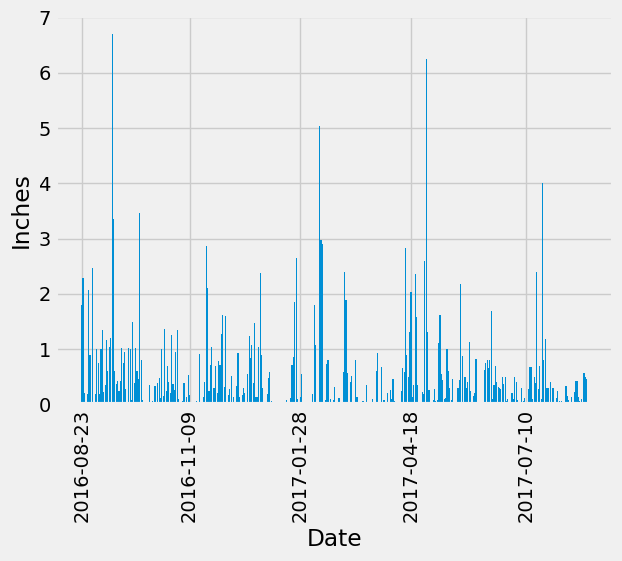

In [96]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_earlier = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date >= year_earlier)
measurement_rows = [{"Date": result[0], "prcp": result[1]} for result in results]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(measurement_rows)
measurement_df = measurement_df.rename(columns={"prcp":"Precipitation"})

# Sort the dataframe by date
sorted_measurement_df = measurement_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
tick_locations = ["2016-08-23", "2016-11-09", "2017-01-28", "2017-04-18", "2017-07-10"]
plt.bar(sorted_measurement_df["Date"], sorted_measurement_df["Precipitation"])
plt.xticks(tick_locations, rotation="vertical")
plt.tight_layout
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()


In [45]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [106]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [148]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [150]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station,
       func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
session.query(*sel).filter(measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

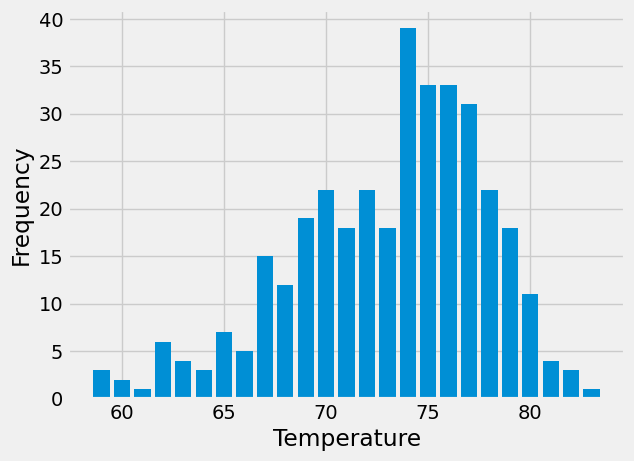

In [161]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_results = session.query(measurement.tobs, func.count(measurement.tobs)).group_by(measurement.tobs).\
    filter(measurement.station == 'USC00519281').filter(measurement.date >= year_earlier).\
    order_by(measurement.tobs)
temperature_rows = [{"Temperature": result[0], "Frequency": result[1]} for result in active_results]

temperature_df = pd.DataFrame(temperature_rows)

plt.bar(temperature_df["Temperature"], temperature_df["Frequency"])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [162]:
# Close Session
session.close()